# Smoking is bad

In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pl.read_csv("data/smoking_data.csv")
df.head()

,outcome,smoker,age,gender,salary
i64,str,str,i64,str,f64
0,"""Alive""","""Yes""",23,"""female""",92236.0
1,"""Alive""","""Yes""",18,"""female""",20869.0
2,"""Dead""","""Yes""",71,"""male""",78777.0
3,"""Alive""","""No""",67,"""female""",34190.0
4,"""Alive""","""No""",64,"""male""",null


In [3]:
df.shape

(1314, 6)

In [4]:
df.describe()  # we do not really get that much of an insight for our string columns

statistic,,outcome,smoker,age,gender,salary
str,f64,str,str,f64,str,f64
"""count""",1314.0,"""1314""","""1314""",1314.0,"""1314""",627.0
"""null_count""",0.0,"""0""","""0""",0.0,"""0""",687.0
"""mean""",656.5,null,null,46.920091,null,50596.145136
"""std""",379.463437,null,null,17.432027,null,28104.914324
"""min""",0.0,"""Alive""","""No""",18.0,"""female""",1129.0
"""25%""",328.0,null,null,32.0,null,27058.0
"""50%""",657.0,null,null,46.0,null,49794.0
"""75%""",985.0,null,null,61.0,null,74324.0
"""max""",1313.0,"""Dead""","""Yes""",84.0,"""male""",99921.0


In [5]:
df.null_count()  # salary column has a lot of missings; maybe we should drop it

,outcome,smoker,age,gender,salary
u32,u32,u32,u32,u32,u32
0,0,0,0,0,687


In [6]:
# clean data frame and make easier to work with
df_clean = (df.with_columns(
    pl.when(pl.col("gender") == "female").then(0).otherwise(1).alias("gender_num"),
    pl.when(pl.col("smoker") == "No").then(0).otherwise(1).alias("smoker_num"),
    pl.when(pl.col("outcome") == "Dead").then(0).otherwise(1).alias("outcome_num"),
))

df_clean.head()

,outcome,smoker,age,gender,salary,gender_num,smoker_num,outcome_num
i64,str,str,i64,str,f64,i32,i32,i32
0,"""Alive""","""Yes""",23,"""female""",92236.0,0,1,1
1,"""Alive""","""Yes""",18,"""female""",20869.0,0,1,1
2,"""Dead""","""Yes""",71,"""male""",78777.0,1,1,0
3,"""Alive""","""No""",67,"""female""",34190.0,0,0,1
4,"""Alive""","""No""",64,"""male""",null,1,0,1


In [7]:
df_clean.select(["outcome_num", "age", "gender_num", "smoker_num"]).describe()

statistic,outcome_num,age,gender_num,smoker_num
str,f64,f64,f64,f64
"""count""",1314.0,1314.0,1314.0,1314.0
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",0.719178,46.920091,0.499239,0.442922
"""std""",0.449572,17.432027,0.50019,0.496921
"""min""",0.0,18.0,0.0,0.0
"""25%""",0.0,32.0,0.0,0.0
"""50%""",1.0,46.0,0.0,0.0
"""75%""",1.0,61.0,1.0,1.0
"""max""",1.0,84.0,1.0,1.0


## Smoking analysis
Let's first check what the cousin did.

In [8]:
df_clean.group_by("smoker_num").agg(prob_alive=pl.col("outcome_num").mean())

smoker_num,prob_alive
i32,f64
0,0.685792
1,0.761168


Okay, so we get the same results.

In [9]:
df_clean.group_by(["smoker_num", "gender_num"]).agg(prob_alive=pl.col("outcome_num").mean()).sort("smoker_num")

smoker_num,gender_num,prob_alive
i32,i32,f64
0,1,0.677686
0,0,0.693767
1,0,0.743945
1,1,0.778157


Seems like the same still holds; The probability to be alive given smoking is higher for both, male and female.

Of course, we assume that more young ppl. smoke than old ppl. and that young ppl. are more likely to be alive.
So maybe we should look at the age distribution of the smokers.

<Axes: xlabel='age', ylabel='Count'>

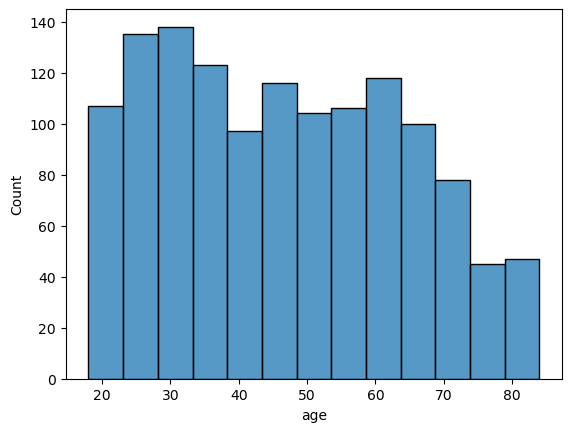

In [10]:
sns.histplot(df_clean, x="age")

In [11]:
# let's create age intervals
df_clean = df_clean.with_columns(
    pl.when(pl.col("age") < 30).then(30)
    .when(pl.col("age") < 40).then(40)
    .when(pl.col("age") < 50).then(50)
    .when(pl.col("age") < 60).then(60)
    .when(pl.col("age") < 70).then(70).otherwise(100).alias("age_interval")
)
df_clean.head()

,outcome,smoker,age,gender,salary,gender_num,smoker_num,outcome_num,age_interval
i64,str,str,i64,str,f64,i32,i32,i32,i32
0,"""Alive""","""Yes""",23,"""female""",92236.0,0,1,1,30
1,"""Alive""","""Yes""",18,"""female""",20869.0,0,1,1,30
2,"""Dead""","""Yes""",71,"""male""",78777.0,1,1,0,100
3,"""Alive""","""No""",67,"""female""",34190.0,0,0,1,70
4,"""Alive""","""No""",64,"""male""",null,1,0,1,70


In [14]:
df_grouped = df_clean.group_by("age_interval").agg(
    prob_alive=pl.col("outcome_num").mean(),
    prob_smoker=pl.col("smoker_num").mean(),
    group_count=pl.len(),
    ).sort("age_interval")

/var/folders/fg/0cpt7frs60d6qw6q79xj2w_00000gn/T/ipykernel_39205/414876817.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


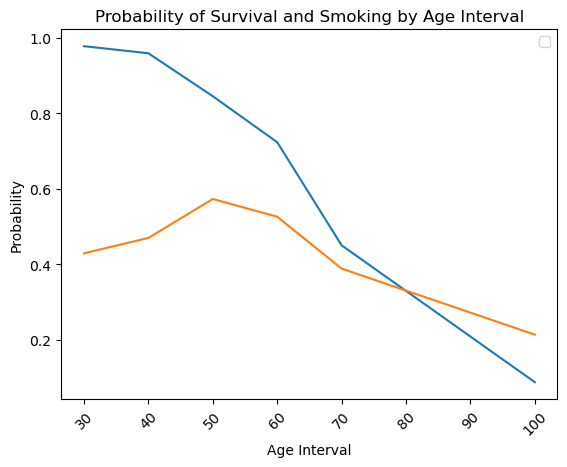

In [ ]:
sns.lineplot(data=df_grouped, x="age_interval", y="prob_alive")
sns.lineplot(data=df_grouped, x="age_interval", y="prob_smoker")
# Customize the plot
plt.title('Probability of Survival and Smoking by Age Interval')
plt.xlabel('Age Interval')
plt.ylabel('Probability')
plt.xticks(rotation=45)  # Rotate x-labels if needed



# Show the plot
#plt.tight_layout()
plt.show()

So we see that age effects staying alive and smoking.

In [17]:
df_by_age = df_clean.group_by(["age_interval", "smoker_num"]).agg(prob_alive=pl.col("outcome_num").mean())
df_by_age

age_interval,smoker_num,prob_alive
i32,i32,f64
50,0,0.886364
30,0,0.979866
100,0,0.088
40,1,0.959677
60,0,0.752475
…,…,…
100,1,0.088235
30,1,0.973214
60,1,0.696429


<Axes: xlabel='age_interval', ylabel='prob_alive'>

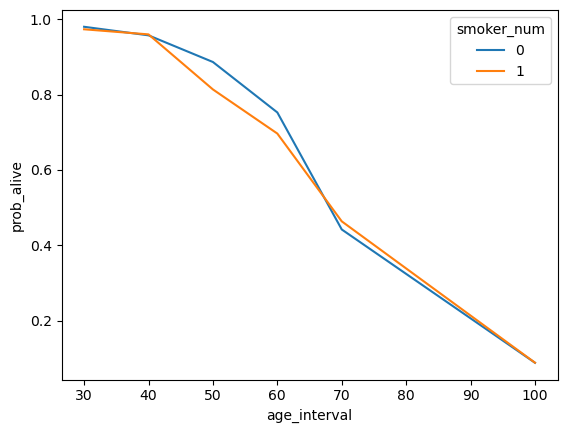

In [18]:
sns.lineplot(data=df_by_age, x="age_interval", y="prob_alive", hue="smoker_num")

So it seems that when you are young, your probability to be alive is higher when you do not smoke, and there is a point when this turns around.

In [20]:
# let's make more age brackets
df_clean = df_clean.with_columns(age_int_2=pl.col("age").map_elements(lambda s: np.round(s/10) * 10))
df_clean.head(
)

sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredict

,outcome,smoker,age,gender,salary,gender_num,smoker_num,outcome_num,age_interval,age_int_2
i64,str,str,i64,str,f64,i32,i32,i32,i32,f64
0,"""Alive""","""Yes""",23,"""female""",92236.0,0,1,1,30,20.0
1,"""Alive""","""Yes""",18,"""female""",20869.0,0,1,1,30,20.0
2,"""Dead""","""Yes""",71,"""male""",78777.0,1,1,0,100,70.0
3,"""Alive""","""No""",67,"""female""",34190.0,0,0,1,70,70.0
4,"""Alive""","""No""",64,"""male""",null,1,0,1,70,60.0


<Axes: xlabel='age_int_2', ylabel='prob_alive'>

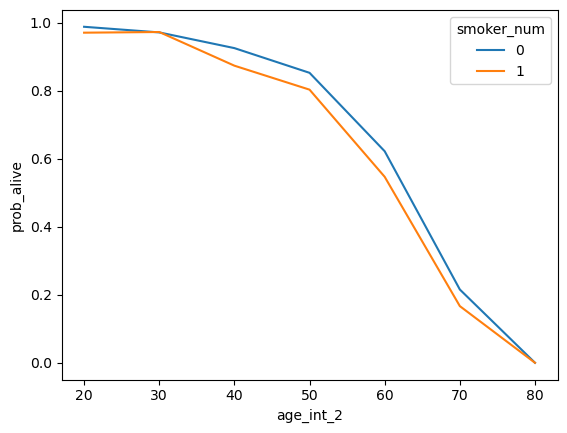

In [21]:
df_by_age = df_clean.group_by(["age_int_2", "smoker_num"]).agg(prob_alive=pl.col("outcome_num").mean())
sns.lineplot(data=df_by_age, x="age_int_2", y="prob_alive", hue="smoker_num")